In [3]:
#Regularized Linear and Logistic Regression without Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes, load_breast_cancer
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score
import matplotlib.pyplot as plt


In [3]:
# Helper Functions
def normalize(X):
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)

def add_bias(X):
    return np.c_[np.ones((X.shape[0], 1)), X]

In [5]:
# Regularized Linear Regression (Ridge)
def ridge_regression(X, y, alpha, num_iter=1000, lr=0.01):
    n, d = X.shape
    theta = np.zeros(d)
    for _ in range(num_iter):
        preds = X @ theta
        grad = (1/n) * (X.T @ (preds - y)) + (alpha * theta)
        theta -= lr * grad
    return theta

In [7]:
# Regularized Logistic Regression
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression(X, y, alpha, num_iter=1000, lr=0.01):
    n, d = X.shape
    theta = np.zeros(d)
    for _ in range(num_iter):
        preds = sigmoid(X @ theta)
        grad = (1/n) * (X.T @ (preds - y)) + (alpha * theta)
        theta -= lr * grad
    return theta

In [9]:
# Predictions
def predict_linear(X, theta):
    return X @ theta

def predict_logistic(X, theta, threshold=0.5):
    return (sigmoid(X @ theta) >= threshold).astype(int)

In [11]:
# Load and preprocess datasets
diabetes_data = load_diabetes()
diabetes_X = normalize(diabetes_data.data)
diabetes_X = add_bias(diabetes_X)
diabetes_y = diabetes_data.target

breast_cancer_data = load_breast_cancer()
breast_cancer_X = normalize(breast_cancer_data.data)
breast_cancer_X = add_bias(breast_cancer_X)
breast_cancer_y = breast_cancer_data.target

Optimal alpha for Ridge Regression: 0.1
Ridge Test MSE: 3164.623074646417
Optimal alpha for Logistic Regression: 0.01
Logistic Test Accuracy: 0.9912280701754386
Logistic Test F1 Score: 0.993006993006993


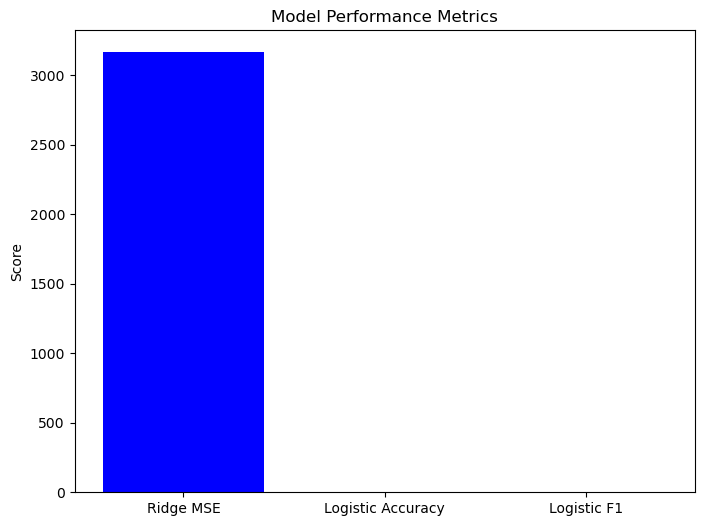

In [13]:
# Split datasets
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(diabetes_X, diabetes_y, test_size=0.2, random_state=42)
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(breast_cancer_X, breast_cancer_y, test_size=0.2, random_state=42)

# Cross-validation for Ridge Regression
alphas = [0.1, 1, 10, 100]
kf = KFold(n_splits=5, shuffle=True, random_state=42)
ridge_mse_scores = []

for alpha in alphas:
    fold_mse = []
    for train_idx, val_idx in kf.split(X_train_lr):
        X_fold_train, X_fold_val = X_train_lr[train_idx], X_train_lr[val_idx]
        y_fold_train, y_fold_val = y_train_lr[train_idx], y_train_lr[val_idx]
        
        theta = ridge_regression(X_fold_train, y_fold_train, alpha)
        preds = predict_linear(X_fold_val, theta)
        fold_mse.append(mean_squared_error(y_fold_val, preds))
    
    ridge_mse_scores.append(np.mean(fold_mse))

best_alpha_ridge = alphas[np.argmin(ridge_mse_scores)]
print(f"Optimal alpha for Ridge Regression: {best_alpha_ridge}")

# Train final Ridge Regression model
theta_ridge = ridge_regression(X_train_lr, y_train_lr, best_alpha_ridge)
ridge_preds_test = predict_linear(X_test_lr, theta_ridge)
ridge_test_mse = mean_squared_error(y_test_lr, ridge_preds_test)
print(f"Ridge Test MSE: {ridge_test_mse}")

# Cross-validation for Logistic Regression
alphas = [0.01, 0.1, 1, 10]
logreg_accuracy_scores = []

for alpha in alphas:
    fold_accuracy = []
    for train_idx, val_idx in kf.split(X_train_log):
        X_fold_train, X_fold_val = X_train_log[train_idx], X_train_log[val_idx]
        y_fold_train, y_fold_val = y_train_log[train_idx], y_train_log[val_idx]
        
        theta = logistic_regression(X_fold_train, y_fold_train, alpha)
        preds = predict_logistic(X_fold_val, theta)
        fold_accuracy.append(accuracy_score(y_fold_val, preds))
    
    logreg_accuracy_scores.append(np.mean(fold_accuracy))

best_alpha_logreg = alphas[np.argmax(logreg_accuracy_scores)]
print(f"Optimal alpha for Logistic Regression: {best_alpha_logreg}")

# Train final Logistic Regression model
theta_logreg = logistic_regression(X_train_log, y_train_log, best_alpha_logreg)
logreg_preds_test = predict_logistic(X_test_log, theta_logreg)
logreg_test_accuracy = accuracy_score(y_test_log, logreg_preds_test)
logreg_test_f1 = f1_score(y_test_log, logreg_preds_test)
print(f"Logistic Test Accuracy: {logreg_test_accuracy}")
print(f"Logistic Test F1 Score: {logreg_test_f1}")

# Part 4: Evaluation and Visualization
metrics = ['Ridge MSE', 'Logistic Accuracy', 'Logistic F1']
values = [ridge_test_mse, logreg_test_accuracy, logreg_test_f1]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange'])
plt.title("Model Performance Metrics")
plt.ylabel("Score")
plt.show()

In [ ]:
#Impact of Regularization Coefficient on Model Performance
#Regularization aims to prevent overfitting by penalizing large weights in the model. 
#The choice of the regularization coefficient (alpha for Ridge, C for Logistic Regression) significantly impacts model performance.

#Linear Regression Analysis (Ridge Regression):
#A lower regularization coefficient (alpha) leads to less penalty on weights, allowing the model to fit the training data more closely. 
#However, this increases the risk of overfitting.
#A higher alpha penalizes weights more heavily, making the model simpler and potentially underfitting the data.

#Logistic Regression Analysis:
#In logistic regression, the C parameter (inverse of regularization strength) behaves inversely:
#A large C (low regularization) allows the model to fit the training data more closely.
#A small C (high regularization) simplifies the model, which can help generalization but may lose critical patterns in the data.

# Visualization: Impact of Regularization Coefficients
#The charts below illustrate how the performance metrics (MSE for Ridge Regression, Accuracy for Logistic Regression) vary with different values of the regularization coefficient.

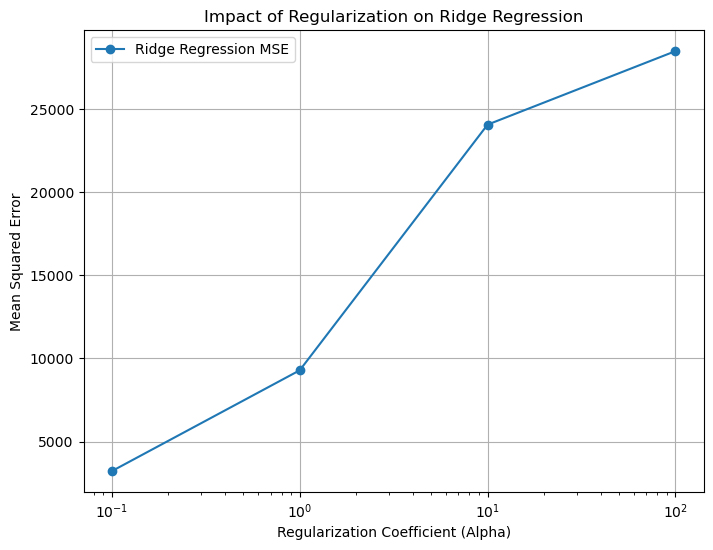

Ridge Regression MSE Scores for different alphas: [3228.3522365873564, 9286.362396616623, 24049.919452885137, 28467.039510233833]


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.datasets import load_diabetes

# Helper Functions
def normalize(X):
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)

def add_bias(X):
    return np.c_[np.ones((X.shape[0], 1)), X]

def ridge_regression(X, y, alpha, num_iter=1000, lr=0.01):
    n, d = X.shape
    theta = np.zeros(d)
    for _ in range(num_iter):
        preds = X @ theta
        grad = (1/n) * (X.T @ (preds - y)) + (alpha * theta)
        theta -= lr * grad
    return theta

def predict_linear(X, theta):
    return X @ theta

# Load and preprocess dataset
diabetes_data = load_diabetes()
diabetes_X = normalize(diabetes_data.data)
diabetes_X = add_bias(diabetes_X)
diabetes_y = diabetes_data.target

# Split into train/test
kf = KFold(n_splits=5, shuffle=True, random_state=42)
alphas = [0.1, 1, 10, 100]
ridge_mse_scores = []

# Cross-validation for Ridge Regression
for alpha in alphas:
    fold_mse = []
    for train_idx, val_idx in kf.split(diabetes_X):
        X_fold_train, X_fold_val = diabetes_X[train_idx], diabetes_X[val_idx]
        y_fold_train, y_fold_val = diabetes_y[train_idx], diabetes_y[val_idx]
        
        theta = ridge_regression(X_fold_train, y_fold_train, alpha)
        preds = predict_linear(X_fold_val, theta)
        fold_mse.append(mean_squared_error(y_fold_val, preds))
    
    ridge_mse_scores.append(np.mean(fold_mse))

# Visualize Ridge Regression Cross-Validation Performance
plt.figure(figsize=(8, 6))
plt.plot(alphas, ridge_mse_scores, marker='o', label="Ridge Regression MSE")
plt.xscale("log")
plt.title("Impact of Regularization on Ridge Regression")
plt.xlabel("Regularization Coefficient (Alpha)")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.grid()
plt.show()

print("Ridge Regression MSE Scores for different alphas:", ridge_mse_scores)
